In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

df = pd.read_csv("./SalaryData.csv")

In [2]:
df.shape

(30, 2)

In [3]:
df.isnull().values.any()

False

In [4]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
df_copy = train_set.copy()

In [6]:
df_copy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [7]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


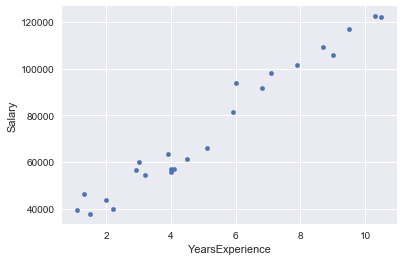

In [8]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

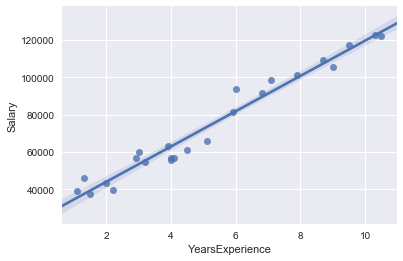

In [9]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

In [25]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [26]:
test_set.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [28]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [ 9423.81532303]
Intercept:  25321.5830118


In [15]:
salary_pred = lin_reg.predict(10)

salary_pred

array([ 119559.73624209])

In [22]:
print(salary_pred)
print(test_set_full["Salary"])

[ 119559.73624209]


In [29]:
lin_reg.score(test_set, test_set_full["Salary"])

0.90244617741804967